<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/Deep_Learning_with_PyTorch_Chapter00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch

code examples from https://github.com/dvgodoy/PyTorchStepByStep

In [64]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [96]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [102]:
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

In [110]:
def figure0(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    ax.scatter(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([0, 3.1])
    ax.set_title('Generated Data - x , y ')

    
    return fig, ax

In [65]:
true_b = 1
true_w = 2

n= 100

#random data generation
np.random.seed(42)
x = np.random.rand(n,1)

e = (0.1 * np.random.randn(n,1))

# linear equation
y = true_b + true_w * x + e

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d4c214d50>)

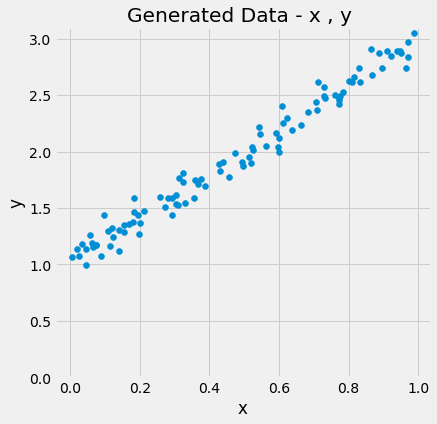

In [111]:
figure0(x, y)

In [66]:
idx = np.arange(n)
np.random.shuffle(idx)

#split 80: 20 train vs test
train_idx = idx[:int(n*0.8)]
val_idx = idx[int(n*0.8):]

print(len(train_idx))
print(len(val_idx))

80
20


In [67]:
# generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val =  x[val_idx], y[val_idx]

(<Figure size 1152x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d4c414a10>,
       dtype=object))

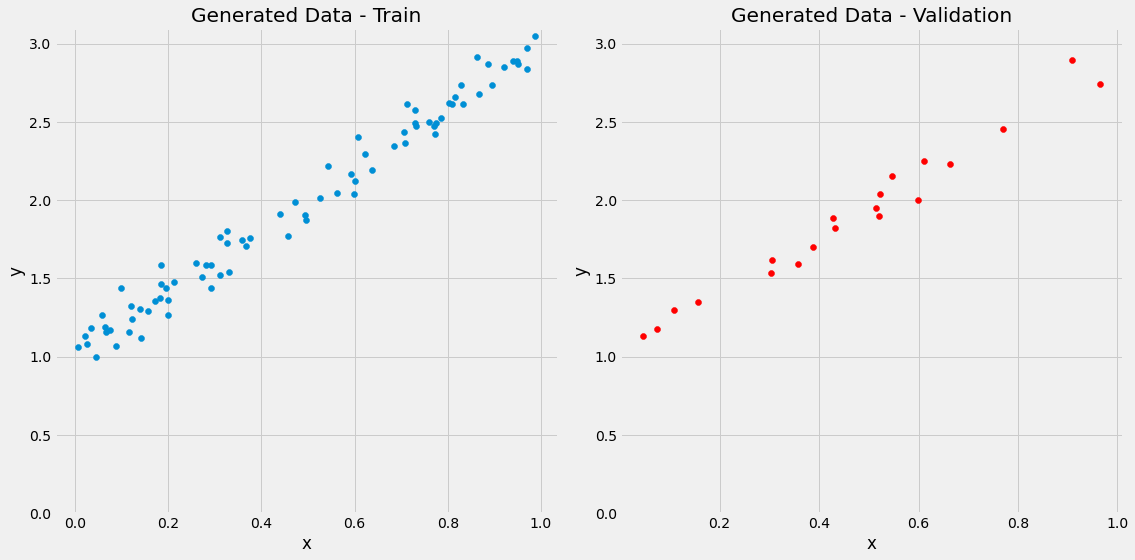

In [101]:
figure1(x_train, y_train, x_val, y_val)

# compute model's prediction 

In [68]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

In [69]:
print(b.shape)
print(w.shape)

(1,)
(1,)


In [70]:
yhat = b + w * x_train
yhat.shape

(80, 1)

In [71]:
error = (yhat - y_train)
error.shape

(80, 1)

In [72]:
loss = (error ** 2).mean()
loss

2.7421577700550976

# loss surface

In [78]:
# create possible values for b & w
b_range = np.linspace(true_b -3, true_b+3, 101)
b_range.shape

(101,)

In [74]:
w_range = np.linspace(true_w -3, true_w+3, 101)
w_range.shape

(101,)

In [75]:
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

# prediction for a single data point in training data

In [79]:
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

In [81]:
#repeat the same process for every value in training set x_train

function = lambda x: bs+ws*x
all_predictions = np.apply_along_axis(func1d = function, axis = 1, arr = x_train)

In [82]:
all_predictions.shape

(80, 101, 101)

In [83]:
y_train.shape

(80, 1)

In [87]:
all_lables = y_train.reshape(-1,1,1)
all_lables.shape

(80, 1, 1)

In [88]:
all_errors = (all_predictions - all_lables)
all_errors.shape

(80, 101, 101)

In [90]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)